In [1]:
%matplotlib inline  
import numpy as np 
import scipy as sp 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from scipy.stats import norm  
sns.set_style('white') 
sns.set_context('talk')  
np.random.seed(123)

import numpy as np

import scipy.special as sp
from scipy import integrate
from tqdm import tqdm

In [2]:
from sklearn.linear_model import LinearRegression

In [3]:
def Rosenbrock(x):
    y = 0
    for i in range(x.shape[0]-1):
        y+=((1-x[i])**2)+100*((x[i+1]-(x[i]**2))**2)
    return y

In [4]:
def heavy_ball(f,grad,x0,eps=10**(-4),N = 10000,alpha = 0.01,beta = 0.1):
    x_cur = np.asarray(x0)
    x_prev = np.asarray(x0)
    M = 0
    f_values = []
    grads = []
    points = []
    for i in (range(N)):
        points.append(x_cur)
        grads.append(grad(x_cur))
        f_values.append(f(x_cur))
        x_new = x_cur - alpha*grad(x_cur)+beta*(x_cur - x_prev)
        M+=1
            
        if np.linalg.norm(grad(x_new))<eps:   
            break
        x_prev = x_cur
        x_cur = x_new
    points.append(x_cur)
    return x_cur,M,grads, points,f_values

In [5]:
def grad_rosenbrock(x):
    y = np.zeros_like(x)
    y[0] = -2*(1-x[0]) - 400*(x[1] - x[0]**2)*x[0]
    for i in range(1, x.shape[0] - 1):
        y[i] = -2*(1-x[i])+200*(x[i]-x[i-1]**2)-400*(-x[i]**2+x[i+1])*x[i]
    y[-1] = 200*(x[-1]-x[-2]**2)
    return y

In [6]:
x0 = [-1,-1,1,1,1,1,1,1,1,1]
beta = 0.8
N = 10000

In [ ]:
x, m, grads, points,f_values = heavy_ball(Rosenbrock,grad_rosenbrock,x0 = x0,alpha = 0.0018,beta = beta,N=N)

In [35]:

def get_graph(x, m, grads, points,f_values):
    x_last = np.linspace(300,m,m-300).reshape(-1,1)
    log_norms = np.log(np.sqrt(np.sum(np.array(grads[300:m])**2, axis = 1)))
    reg1 = LinearRegression().fit(x_last, log_norms)

    predicts1 = x_last*reg1.coef_+reg1.intercept_
    plt.plot(np.linspace(1, m, m), np.log(np.sqrt(np.sum(np.array(grads)**2, axis = 1))))
    plt.plot(x_last, predicts1,color= 'red')
    plt.xlabel('Номер итерации')
    plt.ylabel('Логарифм нормы градиента')
    plt.show()

    x_last = np.linspace(300,m,m-300).reshape(-1,1)
    reg2 = LinearRegression().fit(x_last, np.log(f_values[300:m]))

    predicts2 = x_last*reg2.coef_+reg2.intercept_
    plt.plot(np.linspace(1, m, m), np.log(f_values))
    plt.plot(x_last,predicts2,color= 'red')
    plt.xlabel('Номер итерации')
    plt.ylabel('Логарифм значения функции')
    plt.show()

    points = np.array(points)
#     print('предельная точка:',x)
    print('количество итераций:',m)
    print('логарифм знаменателя прогрессии для градиентов:',reg1.coef_[0])
    print('логарифм знаменателя прогрессии для значения функций:',reg2.coef_[0])
    print('знаменатель прогрессии для градиентов:',np.exp(reg1.coef_[0]))
    print('знаменатель прогрессии для значений:',np.exp(reg2.coef_[0]))

    plt.plot(points[:,0], points[:,1])
    for i in range(100):
        plt.plot(points[i*5+1,0], points[i*5+1,1], 'bo')
    plt.plot(points[m,0], points[m,1], 'ro')
    plt.plot(points[0,0], points[0,1], 'go')
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.title('Проекция траектории')
    plt.show()
    return

# beta = 0.8

/Users/alarco/anaconda/lib/python3.6/site-packages/sklearn/linear_model/base.py:485: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  linalg.lstsq(X, y)


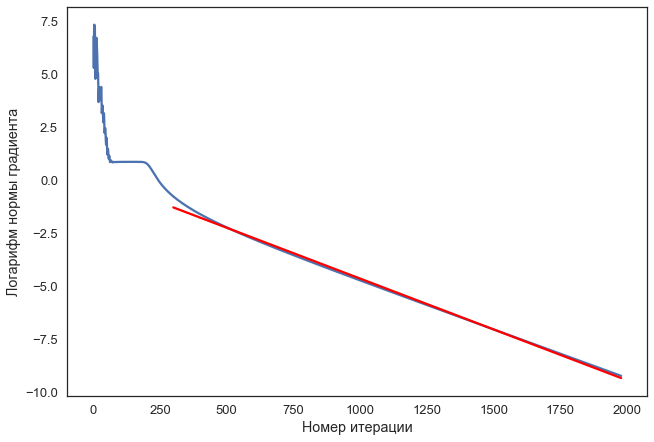

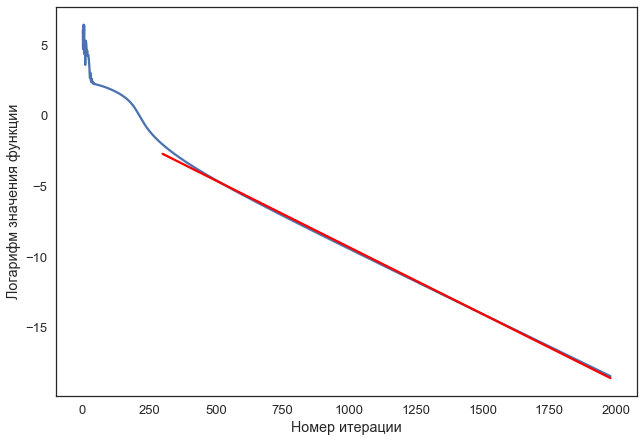

количество итераций: 1978
логарифм знаменателя прогрессии для градиентов: -0.0047962083018835205
логарифм знаменателя прогрессии для значения функций: -0.009444157919810257
знаменатель прогрессии для градиентов: 0.9952152751388273
знаменатель прогрессии для значений: 0.9906002980796973


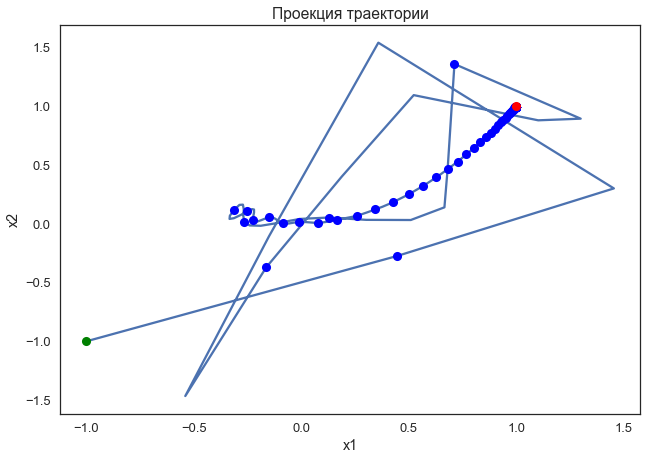

In [8]:
get_graph(x, m, grads, points,f_values)

# beta = 0.9

In [9]:
x0 = [-1,-1,1,1,1,1,1,1,1,1]
beta = 0.9
N = 10000

In [10]:
x, m, grads, points, f_values = heavy_ball(Rosenbrock,grad_rosenbrock,x0 = x0,alpha = 0.00138,beta = beta,N=N)

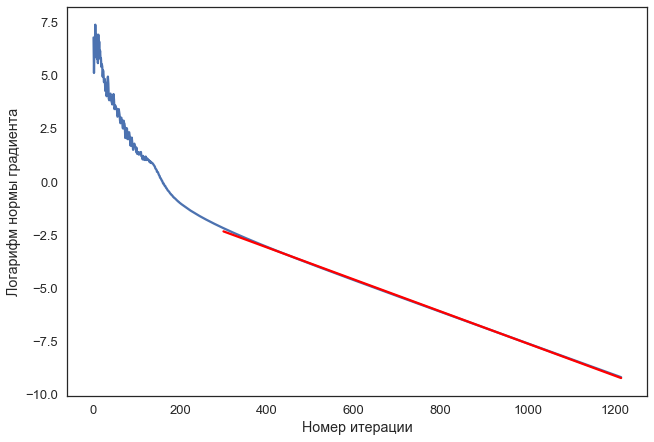

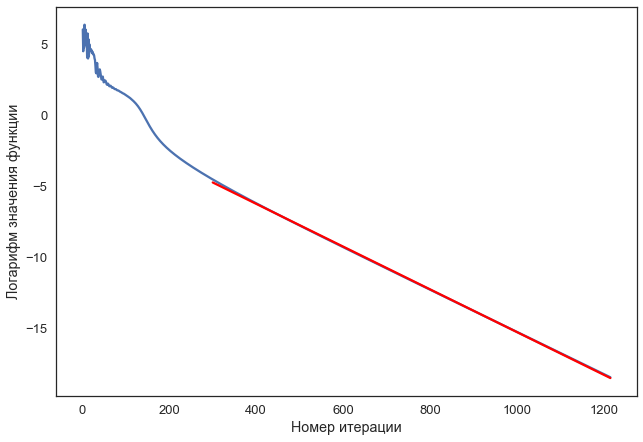

количество итераций: 1215
логарифм знаменателя прогрессии для градиентов: -0.007553871473304649
логарифм знаменателя прогрессии для значения функций: -0.015009078088546016
знаменатель прогрессии для градиентов: 0.9924745873107288
знаменатель прогрессии для значений: 0.9851029967102395


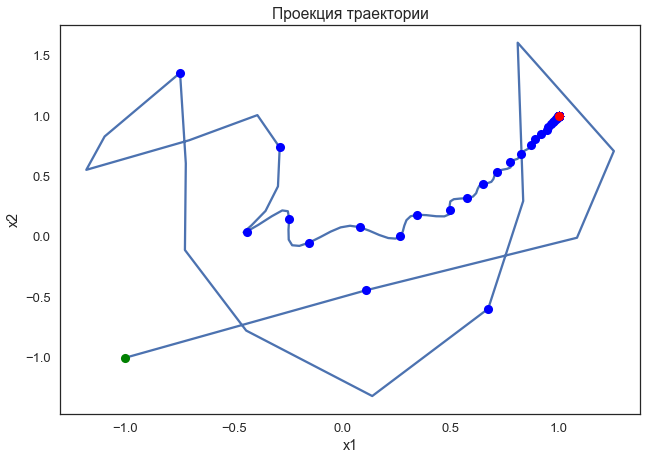

In [11]:
get_graph(x, m, grads, points,f_values)

# beta = 9.5

In [12]:
x0 = [-1,-1,1,1,1,1,1,1,1,1]
beta = 0.95
N = 10000

In [13]:
x, m, grads, points, f_values = heavy_ball(Rosenbrock,grad_rosenbrock,x0 = x0,alpha = 0.00129,beta = beta,N=N)

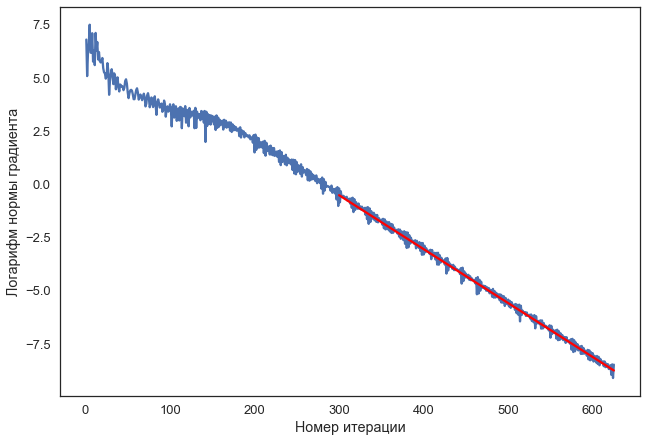

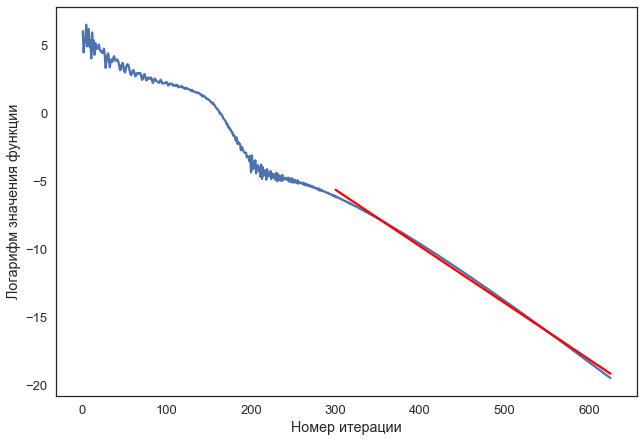

количество итераций: 625
логарифм знаменателя прогрессии для градиентов: -0.02533854762204589
логарифм знаменателя прогрессии для значения функций: -0.04152359069777228
знаменатель прогрессии для градиентов: 0.974979779062876
знаменатель прогрессии для значений: 0.9593267038881912


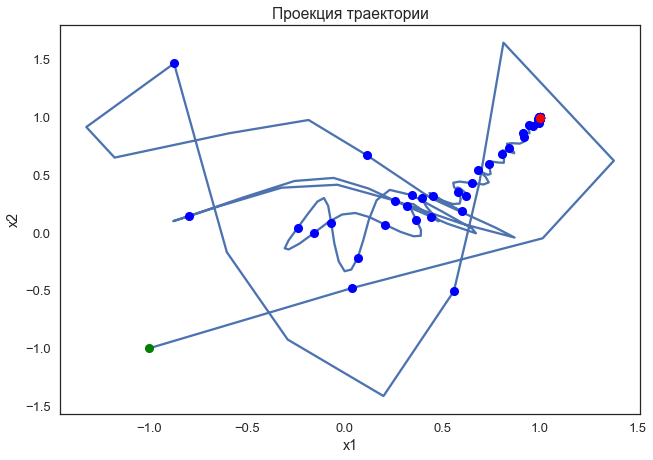

In [14]:
get_graph(x, m, grads, points,f_values)

# beta = 9.9

In [15]:
x0 = [-1,-1,1,1,1,1,1,1,1,1]
beta = 0.99
N = 10000

In [16]:
x, m, grads, points, f_values = heavy_ball(Rosenbrock,grad_rosenbrock,x0 = x0,alpha = 0.00015,beta = beta,N=N)

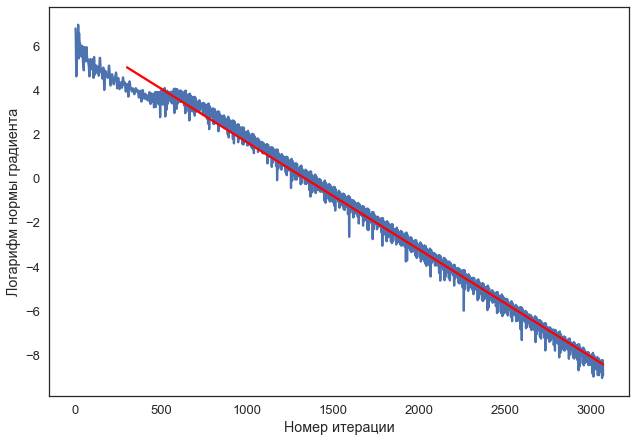

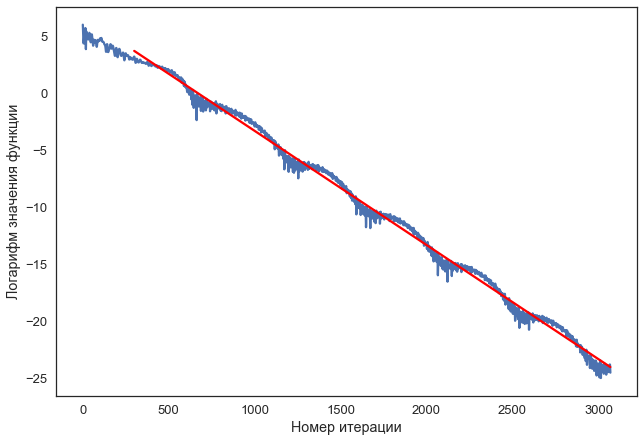

количество итераций: 3069
логарифм знаменателя прогрессии для градиентов: -0.0048592352725542656
логарифм знаменателя прогрессии для значения функций: -0.010023945055007085
знаменатель прогрессии для градиентов: 0.9951525517115246
знаменатель прогрессии для значений: 0.9900261272352672


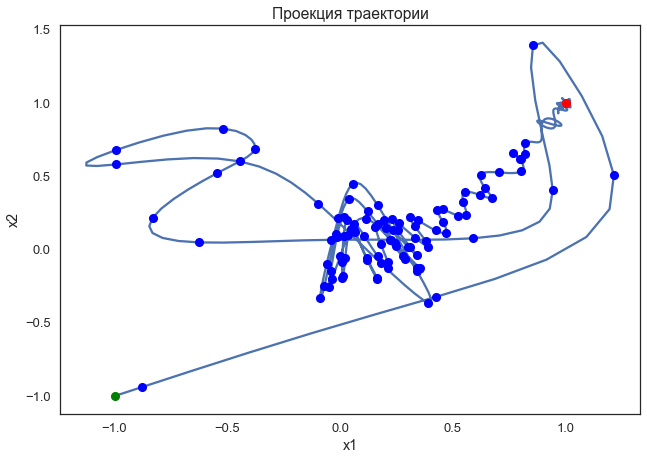

In [17]:
get_graph(x, m, grads, points,f_values)

# max dim

dim = 10000

In [18]:
x0 = np.ones(1000)
beta = 0.99
N = 10000

In [19]:
x0[0] = x[0]-2.0

In [20]:
x0[1]=x[0]-2.0

In [21]:

%time x, m, grads, points, f_values = heavy_ball(Rosenbrock,grad_rosenbrock,x0 = x0,alpha = 0.00015,beta = beta,N=N)

CPU times: user 40.2 s, sys: 202 ms, total: 40.4 s
Wall time: 40.7 s


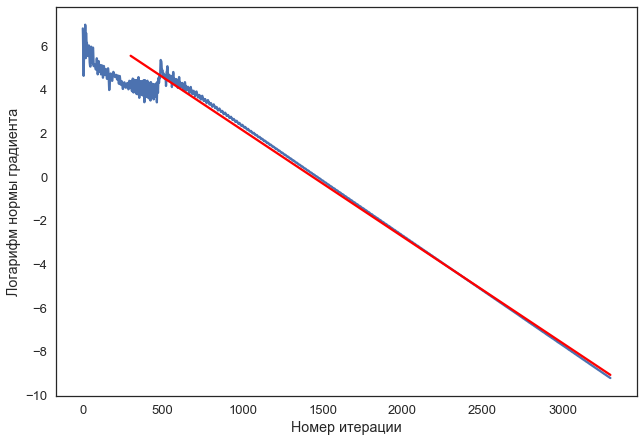

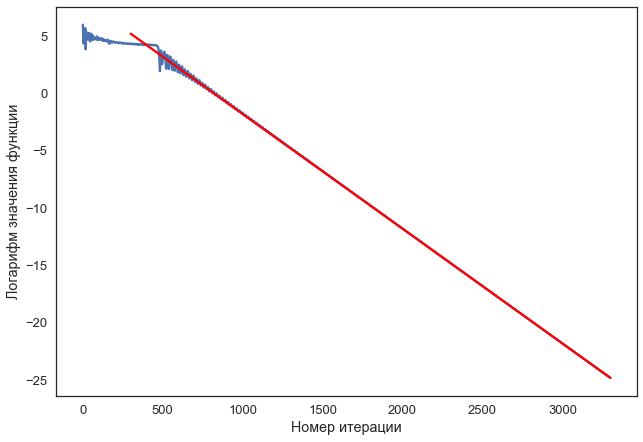

количество итераций: 3299
логарифм знаменателя прогрессии для градиентов: -0.004872639347972845
логарифм знаменателя прогрессии для значения функций: -0.010019982843040086
знаменатель прогрессии для градиентов: 0.9951392127010673
знаменатель прогрессии для значений: 0.9900300499364074


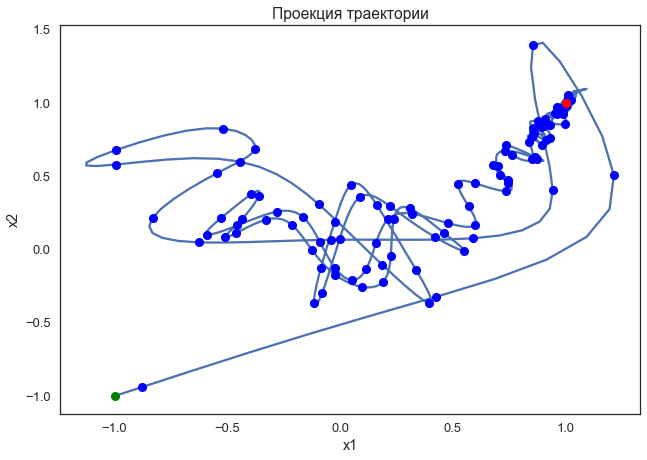

In [22]:
get_graph(x, m, grads, points,f_values)

In [23]:
x0 = np.ones(10000)
beta = 0.99
N = 10000
x0[0] = x[0]-2.0
x0[1]=x[0]-2.0

CPU times: user 6min 36s, sys: 2.15 s, total: 6min 39s
Wall time: 6min 43s


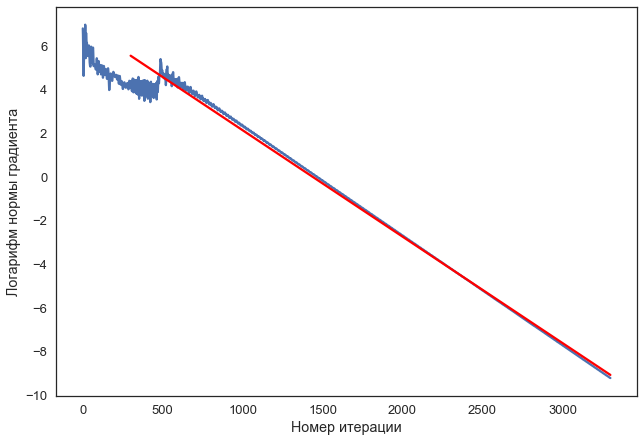

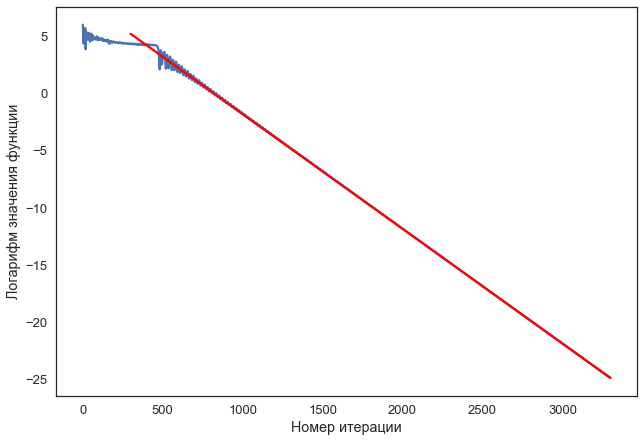

количество итераций: 3299
логарифм знаменателя прогрессии для градиентов: -0.004874151647434859
логарифм знаменателя прогрессии для значения функций: -0.010021207657405011
знаменатель прогрессии для градиентов: 0.9951377077537092
знаменатель прогрессии для значений: 0.9900288373341232


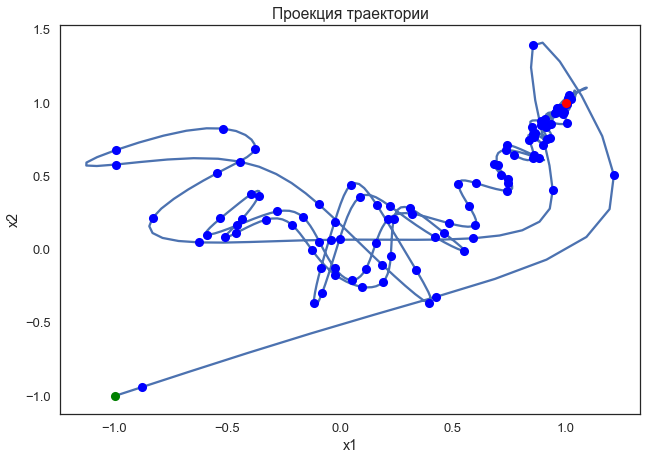

In [24]:
%time x, m, grads, points, f_values = heavy_ball(Rosenbrock,grad_rosenbrock,x0 = x0,alpha = 0.00015,beta = beta,N=N)
get_graph(x, m, grads, points,f_values)

In [36]:
x0 = np.ones(10)
beta = 0.9
N = 10000
x0[0] = x[0]-2.0
x0[1]=x[0]-2.0

In [37]:
%time x, m, grads, points, f_values = heavy_ball(Rosenbrock,grad_rosenbrock,x0 = x0,alpha = 0.00015,beta = beta,N=N)


CPU times: user 1.32 s, sys: 27.5 ms, total: 1.35 s
Wall time: 1.36 s


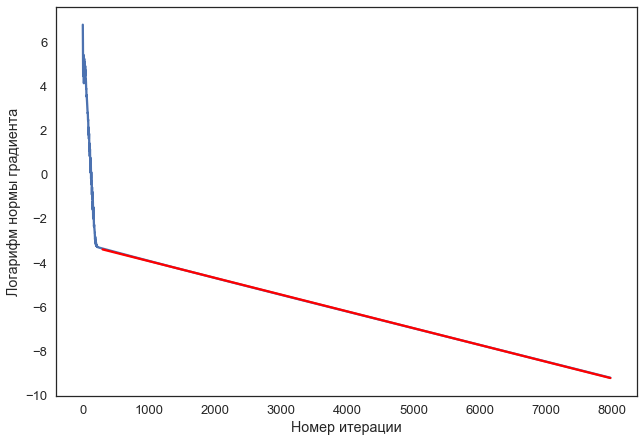

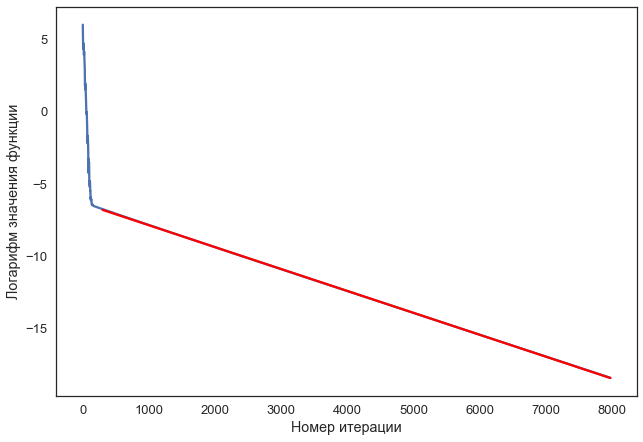

количество итераций: 7975
логарифм знаменателя прогрессии для градиентов: -0.0007600860398709928
логарифм знаменателя прогрессии для значения функций: -0.0015157343805137548
знаменатель прогрессии для градиентов: 0.9992402027523494
знаменатель прогрессии для значений: 0.9984854137646747


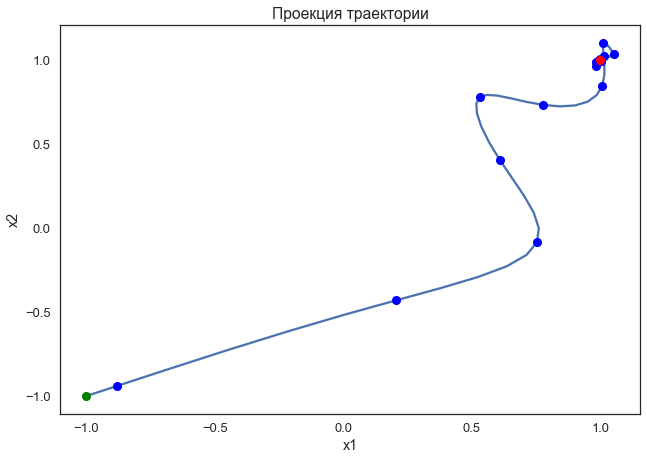

In [39]:
get_graph(x, m, grads, points,f_values)

In [61]:
def get_graph1(x, m, grads, points,f_values):
    x_last = np.linspace(20,m,m-20).reshape(-1,1)
    log_norms = np.log(np.sqrt(np.sum(np.array(grads[20:m])**2, axis = 1)))
    reg1 = LinearRegression().fit(x_last, log_norms)

    predicts1 = x_last*reg1.coef_+reg1.intercept_
    plt.plot(np.linspace(1, m, m), np.log(np.sqrt(np.sum(np.array(grads)**2, axis = 1))))
    plt.plot(x_last, predicts1,color= 'red')
    plt.xlabel('Номер итерации')
    plt.ylabel('Логарифм нормы градиента')
    plt.show()

    x_last = np.linspace(20,m,m-20).reshape(-1,1)
    reg2 = LinearRegression().fit(x_last, np.log(f_values[20:m]))

    predicts2 = x_last*reg2.coef_+reg2.intercept_
    plt.plot(np.linspace(1, m, m), np.log(f_values))
    plt.plot(x_last,predicts2,color= 'red')
    plt.xlabel('Номер итерации')
    plt.ylabel('Логарифм значения функции')
    plt.show()

    points = np.array(points)
#     print('предельная точка:',x)
    print('количество итераций:',m)
    print('логарифм знаменателя прогрессии для градиентов:',reg1.coef_[0])
    print('логарифм знаменателя прогрессии для значения функций:',reg2.coef_[0])
    print('знаменатель прогрессии для градиентов:',np.exp(reg1.coef_[0]))
    print('знаменатель прогрессии для значений:',np.exp(reg2.coef_[0]))

    plt.plot(points[:,0], points[:,1])
    for i in range(100):
        plt.plot(points[i*3+1,0], points[i*3+1,1], 'bo')
    plt.plot(points[m,0], points[m,1], 'ro')
    plt.plot(points[0,0], points[0,1], 'go')
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.title('Проекция траектории')
    plt.show()
    return

In [62]:
x0 = np.ones(1000)
beta = 0.9
N = 10000
x0[0] = x[0]-2.0
x0[1]=x[0]-2.0

In [63]:
%time x, m, grads, points, f_values = heavy_ball(Rosenbrock,grad_rosenbrock,x0 = x0,alpha = 0.00015,beta = beta,N=N)



CPU times: user 3.64 s, sys: 21 ms, total: 3.66 s
Wall time: 3.68 s


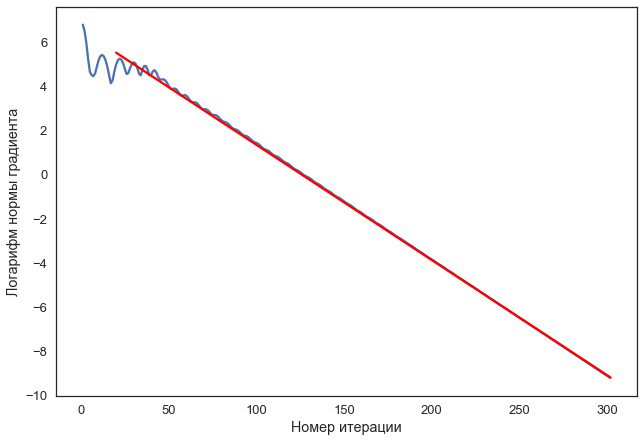

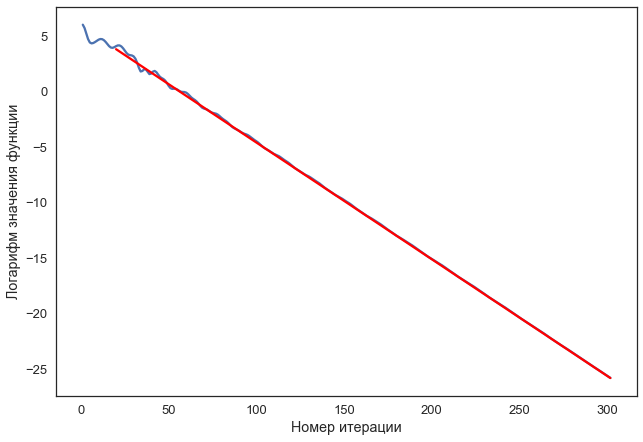

количество итераций: 302
логарифм знаменателя прогрессии для градиентов: -0.05217226259142462
логарифм знаменателя прогрессии для значения функций: -0.10506752967935579
знаменатель прогрессии для градиентов: 0.9491653470767467
знаменатель прогрессии для значений: 0.9002637260127488


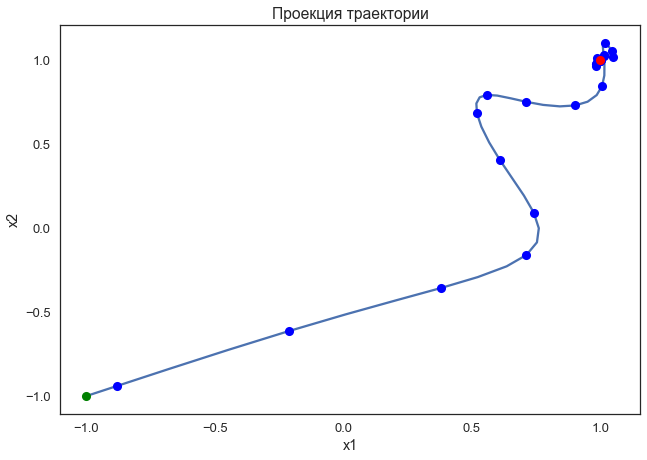

In [64]:
get_graph1(x, m, grads, points,f_values)

In [68]:
x0 = np.ones(100000)
beta = 0.9
N = 10000
x0[0] = x[0]-2.0
x0[1]=x[0]-2.0

In [69]:
%time x, m, grads, points, f_values = heavy_ball(Rosenbrock,grad_rosenbrock,x0 = x0,alpha = 0.00015,beta = beta,N=N)



CPU times: user 6min 51s, sys: 8.99 s, total: 7min
Wall time: 6min 16s


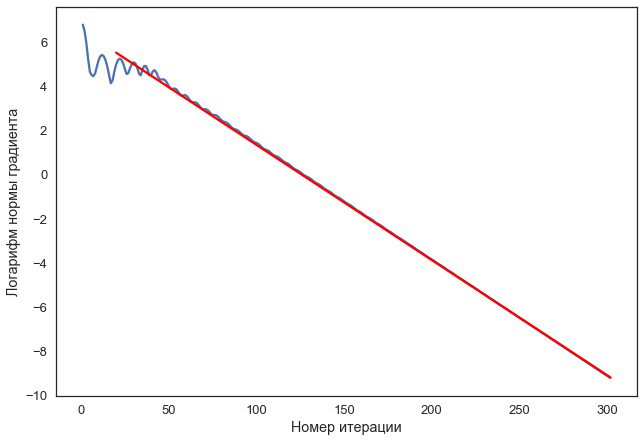

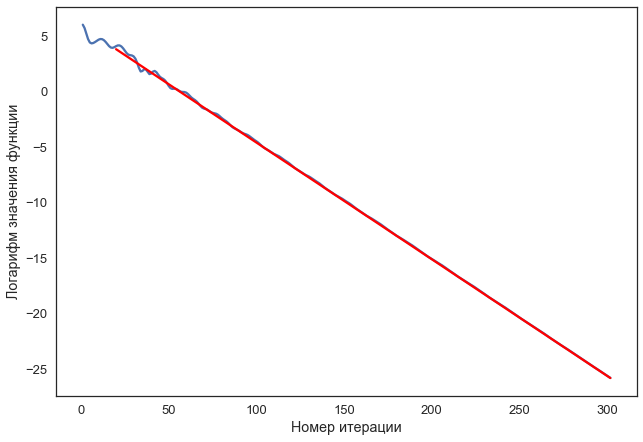

количество итераций: 302
логарифм знаменателя прогрессии для градиентов: -0.05217226259235408
логарифм знаменателя прогрессии для значения функций: -0.1050675296815088
знаменатель прогрессии для градиентов: 0.9491653470758645
знаменатель прогрессии для значений: 0.9002637260108106


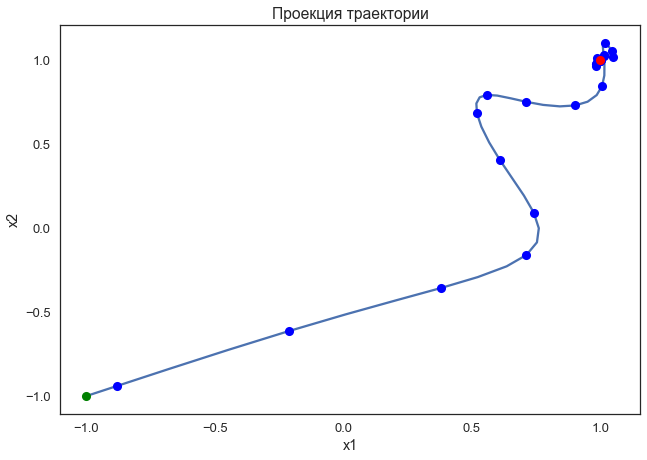

In [70]:
get_graph1(x, m, grads, points,f_values)

In [71]:
x0 = np.ones(1000)
beta = 0.8
N = 10000
x0[0] = x[0]-2.0
x0[1]=x[0]-2.0

In [76]:
%time x, m, grads, points, f_values = heavy_ball(Rosenbrock,grad_rosenbrock,x0 = x0,alpha = 0.00021,beta = beta,N=N)

CPU times: user 2.37 s, sys: 10.4 ms, total: 2.38 s
Wall time: 2.39 s


In [88]:
def get_graph2(x, m, grads, points,f_values):
    x_last = np.linspace(100,m,m-100).reshape(-1,1)
    log_norms = np.log(np.sqrt(np.sum(np.array(grads[100:m])**2, axis = 1)))
    reg1 = LinearRegression().fit(x_last, log_norms)

    predicts1 = x_last*reg1.coef_+reg1.intercept_
    plt.plot(np.linspace(1, m, m), np.log(np.sqrt(np.sum(np.array(grads)**2, axis = 1))))
    plt.plot(x_last, predicts1,color= 'red')
    plt.xlabel('Номер итерации')
    plt.ylabel('Логарифм нормы градиента')
    plt.show()

    x_last = np.linspace(100,m,m-100).reshape(-1,1)
    reg2 = LinearRegression().fit(x_last, np.log(f_values[100:m]))

    predicts2 = x_last*reg2.coef_+reg2.intercept_
    plt.plot(np.linspace(1, m, m), np.log(f_values))
    plt.plot(x_last,predicts2,color= 'red')
    plt.xlabel('Номер итерации')
    plt.ylabel('Логарифм значения функции')
    plt.show()

    points = np.array(points)
#     print('предельная точка:',x)
    print('количество итераций:',m)
    print('логарифм знаменателя прогрессии для градиентов:',reg1.coef_[0])
    print('логарифм знаменателя прогрессии для значения функций:',reg2.coef_[0])
    print('знаменатель прогрессии для градиентов:',np.exp(reg1.coef_[0]))
    print('знаменатель прогрессии для значений:',np.exp(reg2.coef_[0]))

    plt.plot(points[:,0], points[:,1])
    for i in range(98):
        plt.plot(points[i*2+1,0], points[i*2+1,1], 'bo')
    plt.plot(points[m,0], points[m,1], 'ro')
    plt.plot(points[0,0], points[0,1], 'go')
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.title('Проекция траектории')
    plt.show()
    return

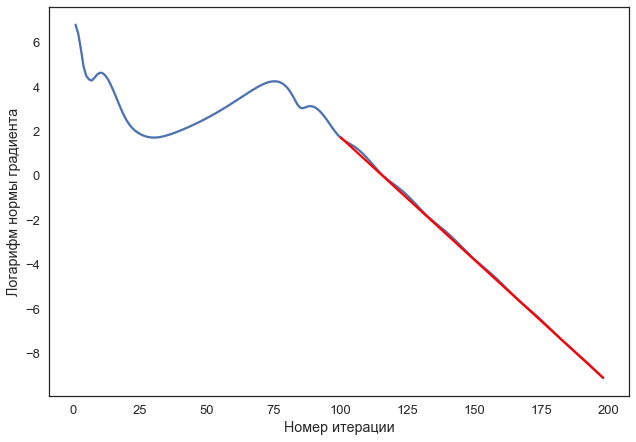

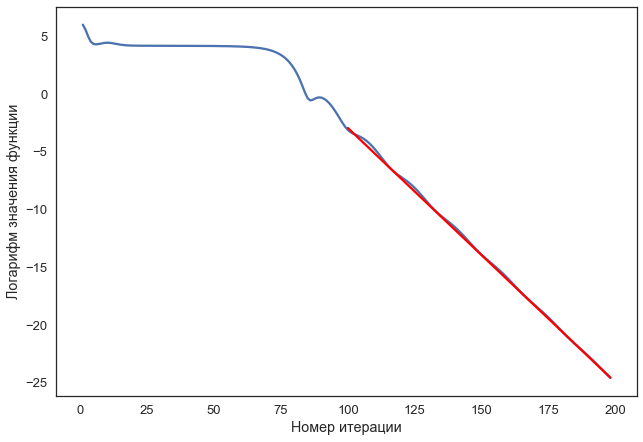

количество итераций: 198
логарифм знаменателя прогрессии для градиентов: -0.11038639227917614
логарифм знаменателя прогрессии для значения функций: -0.2206435207338202
знаменатель прогрессии для градиентов: 0.8954880587681823
знаменатель прогрессии для значений: 0.8020025266101853


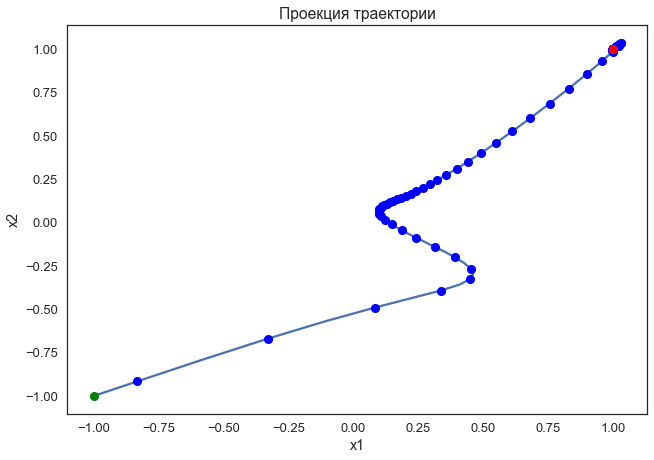

In [89]:
get_graph2(x, m, grads, points,f_values)

In [90]:
x0 = np.ones(100000)
beta = 0.8
N = 10000
x0[0] = x[0]-2.0
x0[1]=x[0]-2.0

In [91]:
%time x, m, grads, points, f_values = heavy_ball(Rosenbrock,grad_rosenbrock,x0 = x0,alpha = 0.00021,beta = beta,N=N)

CPU times: user 4min 37s, sys: 6.3 s, total: 4min 44s
Wall time: 4min 17s


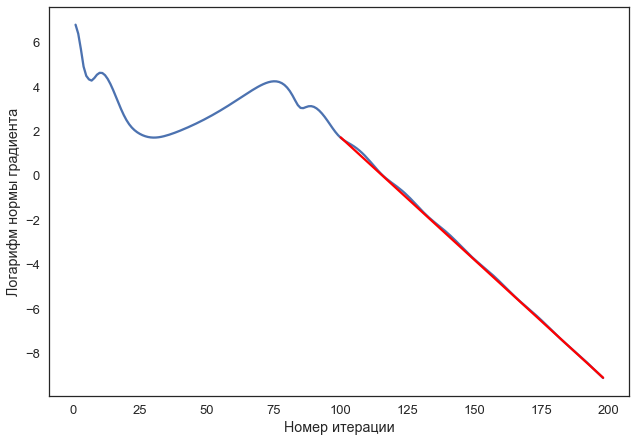

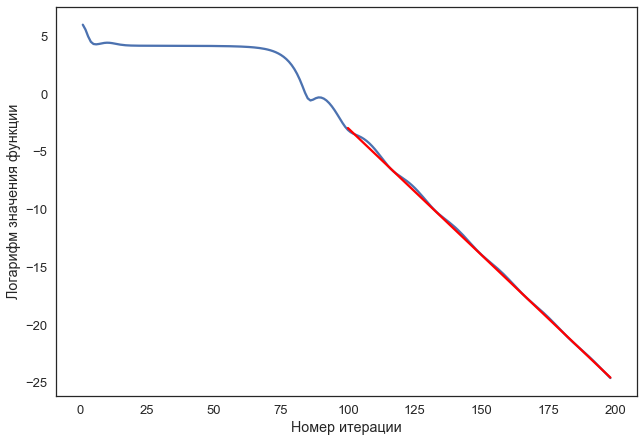

количество итераций: 198
логарифм знаменателя прогрессии для градиентов: -0.11038639304204788
логарифм знаменателя прогрессии для значения функций: -0.2206435231356671
знаменатель прогрессии для градиентов: 0.8954880580850397
знаменатель прогрессии для значений: 0.8020025246838981


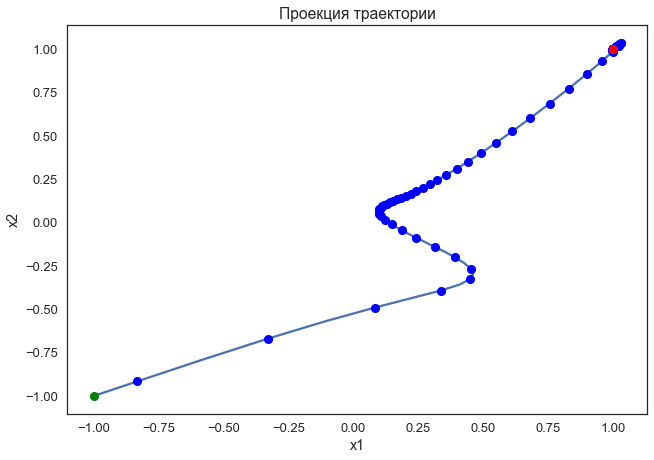

In [92]:
get_graph2(x, m, grads, points,f_values)